## Importing libraries and data

In [33]:
import os
import pandas as pd
import geopandas
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_context("talk")

pd.set_option('display.max_columns', None)

In [34]:
city = 'montreal'

In [52]:
data = pd.read_csv(f"data/{city}.csv")
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,https://www.airbnb.com/users/show/1610679,Edward,2012-01-15,"Bissau, Guinea-Bissau","Hey, I'm from Montreal , Canada .. fascinati...",within a few hours,100%,56%,t,https://a0.muscache.com/im/users/1610679/profi...,https://a0.muscache.com/im/users/1610679/profi...,Little Burgundy,3,4,"['email', 'phone', 'work_email']",t,t,NaN,Le Sud-Ouest,NaN,45.48730,-73.57330,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Outdoor dining area"", ""Resort ...",$88.00,31,62,31,31,62,62,31.0,62.0,NaN,t,3,27,56,56,2023-09-03,6,2,1,2013-01-16,2023-09-01,4.83,4.67,4.50,4.50,5.00,4.83,4.83,NaN,f,1,1,0,0,0.05
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,https://www.airbnb.com/users/show/2666170,Alex,2012-06-17,"Montreal, Canada",Hello!\r\n\r\nI am a film/travel tv series dir...,within a day,50%,57%,f,https://a0.muscache.com/im/pictures/user/e4efc...,https://a0.muscache.com/im/pictures/user/e4efc...,Le Plateau,3,6,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.53666,-73.58142,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Oven"", ""Patio or balcony""...",$91.00,31,1125,31,31,1125,1125,31.0,1125.0,NaN,t,2,16,26,274,2023-09-03,192,8,1,2014-05-20,2023-08-19,4.77,4.80,4.82,4.95,4.89,4.68,4.78,"284723, expires: 2024-06-30",f,2,2,0,0,1.70
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,https://www.airbnb.com/users/show/2737452,Carole,2012-06-25,"Montreal, Canada","Nous sommes une famille, nous avons fait l'acq...",within a few hours,100%,100%,t,https://a0.muscache.com/im/users/2737452/profi...,https://a0.muscache.com/im/users/2737452/profi...,Le Plateau,2,2,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.53090,-73.56854,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Self check-in"", ""Private entra...",$101.00,31,1125,31,31,1125,1125,31.0,1125.0,NaN,t,0,0,

## Exploratory data analysis & data cleaning

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

### Data cleaning

In [47]:
# Convert daily price in local currency to float
data['price'] = data['price'].str.replace(r"(\$|,)", "").astype(float)

In [55]:
object_to_dtype = {
    "host_since": "datetime64[ns]",
    "host_response_rate": "float",
    "host_acceptance_rate": "float",
    "host_is_superhost": "bool",
    "host_has_profile_pic": "bool",
    "host_identity_verified": "bool",
    "instant_bookable": "bool",
    "has_availability": "bool",
}

for col, dtype in object_to_dtype.items():
    if dtype == "float":
        data[col] = data[col].str.replace("%", "").astype(dtype)
    elif dtype == "bool":
        data[col] = data[col].map({"t": True, "f": False}).astype(dtype)
    elif dtype == "datetime64[ns]":
        data[col] = pd.to_datetime(data[col])
    else:
        raise ValueError(f"Unknown dtype: {dtype}")

In [56]:
data.loc[:, object_to_dtype.keys()].sample(5)
# data.loc[:, data.select_dtypes(include=["object"]).columns].sample(5)

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,has_availability
2600,2016-02-19,100.0,100.0,True,True,True,False,True
4985,2016-05-10,100.0,98.0,True,True,True,True,True
7929,2023-03-09,100.0,NaN,False,True,False,False,True
6086,2023-01-19,100.0,100.0,True,True,True,True,True
5522,2022-12-16,99.0,99.0,False,True,True,True,True


In [6]:
# Remove outliers (price > 95% quantile)
data_cleaned = data[data["price"] < data["price"].quantile(0.95)]
print(f"Rows dropped: {data.shape[0] - data_cleaned.shape[0]}")

Rows dropped: 398


### What is the distribution of listing prices?

As we can see, there are no null values in the price column, but there appear to be some outliers in the data. Let's remove the listings with daily prices above the 95th percentile and see what the distribution looks like.

In [7]:
data['price'].describe()

count      7933.000000
mean        205.817597
std        1276.067877
min          14.000000
25%          80.000000
50%         130.000000
75%         219.000000
max      110526.000000
Name: price, dtype: float64

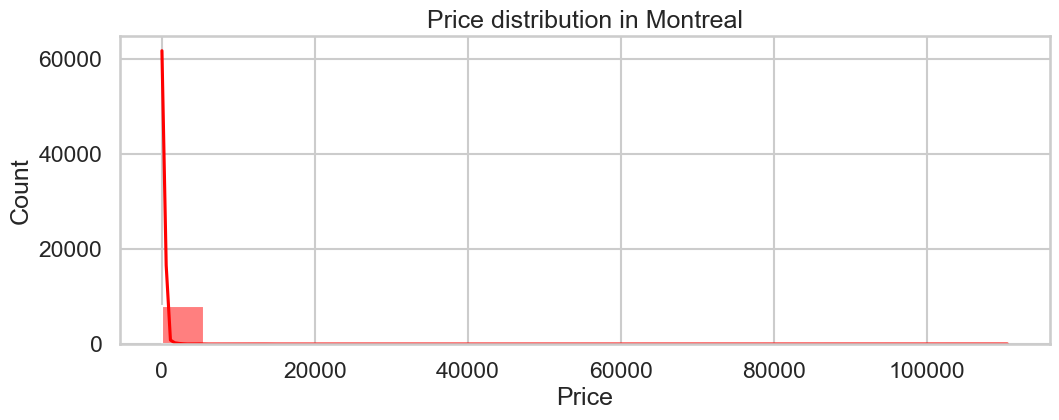

In [8]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()

#### Outliers removed

After removing the outliers, the distribution of listing prices looks much more normal. 

The average price is $150 per night, with a standard deviation of ~$95. The distribution is slightly skewed to the right, which is expected with price data as there could be a fewer number of "luxury" listings that are much more expensive than the average listing.

In [9]:
data_cleaned['price'].describe()

count    7535.000000
mean      149.837956
std        94.261301
min        14.000000
25%        79.000000
50%       125.000000
75%       200.000000
max       467.000000
Name: price, dtype: float64

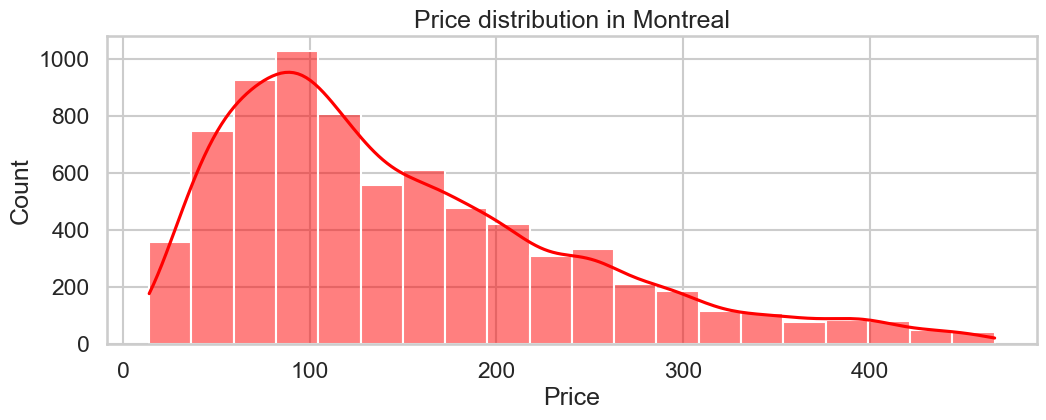

In [10]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data_cleaned, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()

### What is the relationship between the location of the listing (neighborhood) and the price?

We see that most listings are in the neighborhoods of Ville-Marie, Le Plateau-Mont-Royal, Le Sud-Ouest, Côte-des-Neiges-Notre-Dame-de-Grâce, Rosemont-La Petite-Patrie and Mercier-Hochelaga-Maisonneuve.

In [11]:
# First, we check the `neighbourhood_cleansed` column
num_listings_by_neighborhood = (
    data_cleaned["neighbourhood_cleansed"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "neighbourhood", "neighbourhood_cleansed": "count"})
)

num_listings_by_neighborhood.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by neighborhood in {city.capitalize()}"
).relabel_index(
    {0: "Neighborhood", 1: "# of listings"},
    axis="columns",
)

Neighborhood,# of listings
Ville-Marie,2263
Le Plateau-Mont-Royal,1622
Le Sud-Ouest,619
Côte-des-Neiges-Notre-Dame-de-Grâce,561
Rosemont-La Petite-Patrie,549
Mercier-Hochelaga-Maisonneuve,511
Villeray-Saint-Michel-Parc-Extension,336
Ahuntsic-Cartierville,214
Verdun,193
Saint-Laurent,123


#### Average price by neighborhood

We can check the average price of the top 15 neighborhoods with the most listings. We see that the average price is highest in Outremont, followed by Ville-Marie and Le Plateau-Mont-Royal.

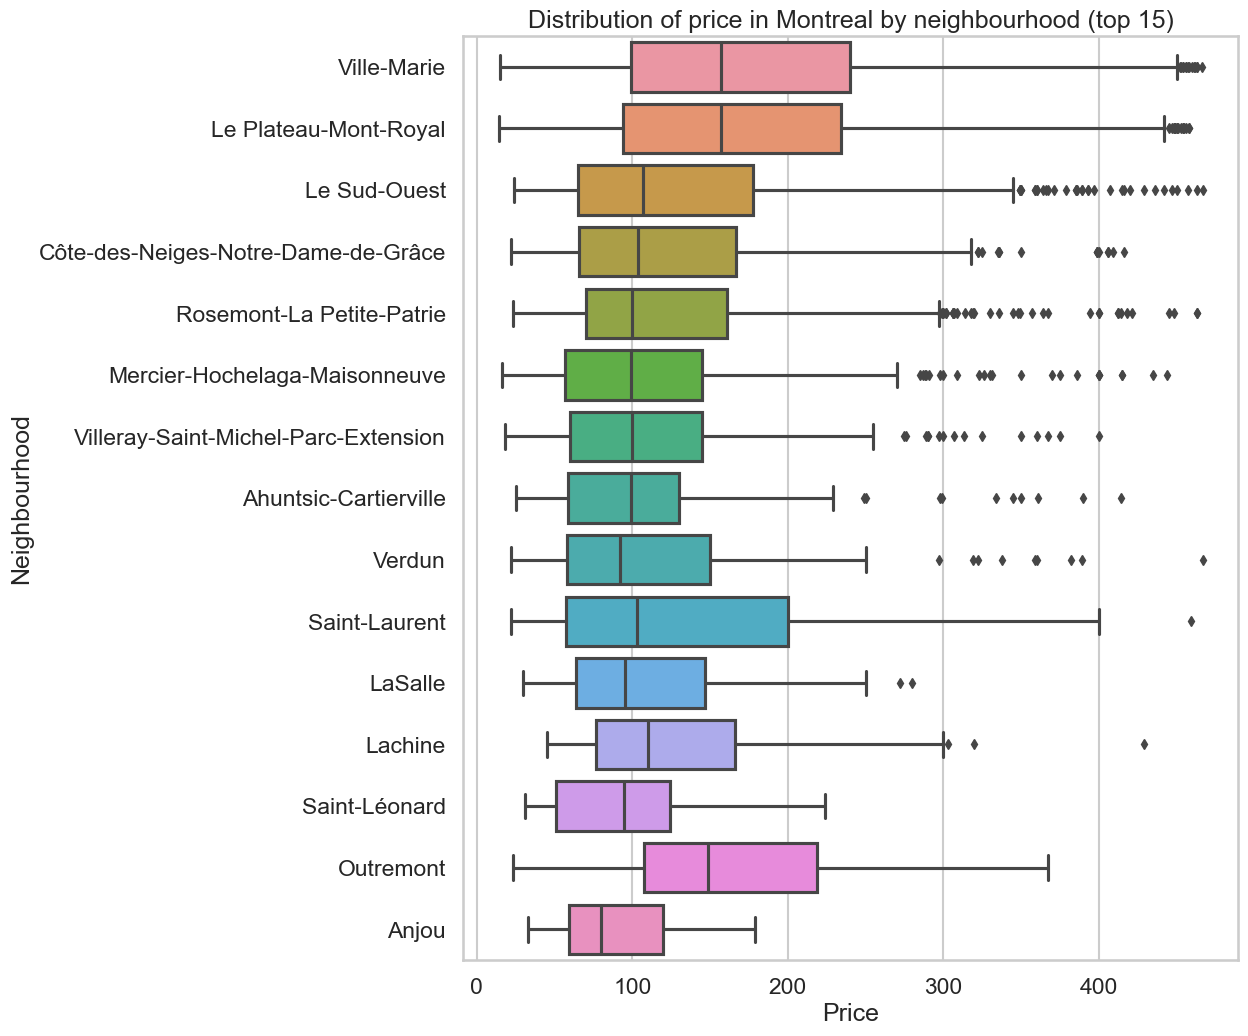

In [12]:
# Then, we see the price of listings in the top 15 neighbourhoods
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
    data=data_cleaned[
        data_cleaned["neighbourhood_cleansed"].isin(
            num_listings_by_neighborhood.iloc[:15].neighbourhood.values
        )
    ],
    y="neighbourhood_cleansed",
    x="price",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
)
ax.set_title(f"Distribution of price in {city.capitalize()} by neighbourhood (top 15)")
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Price")
plt.show()

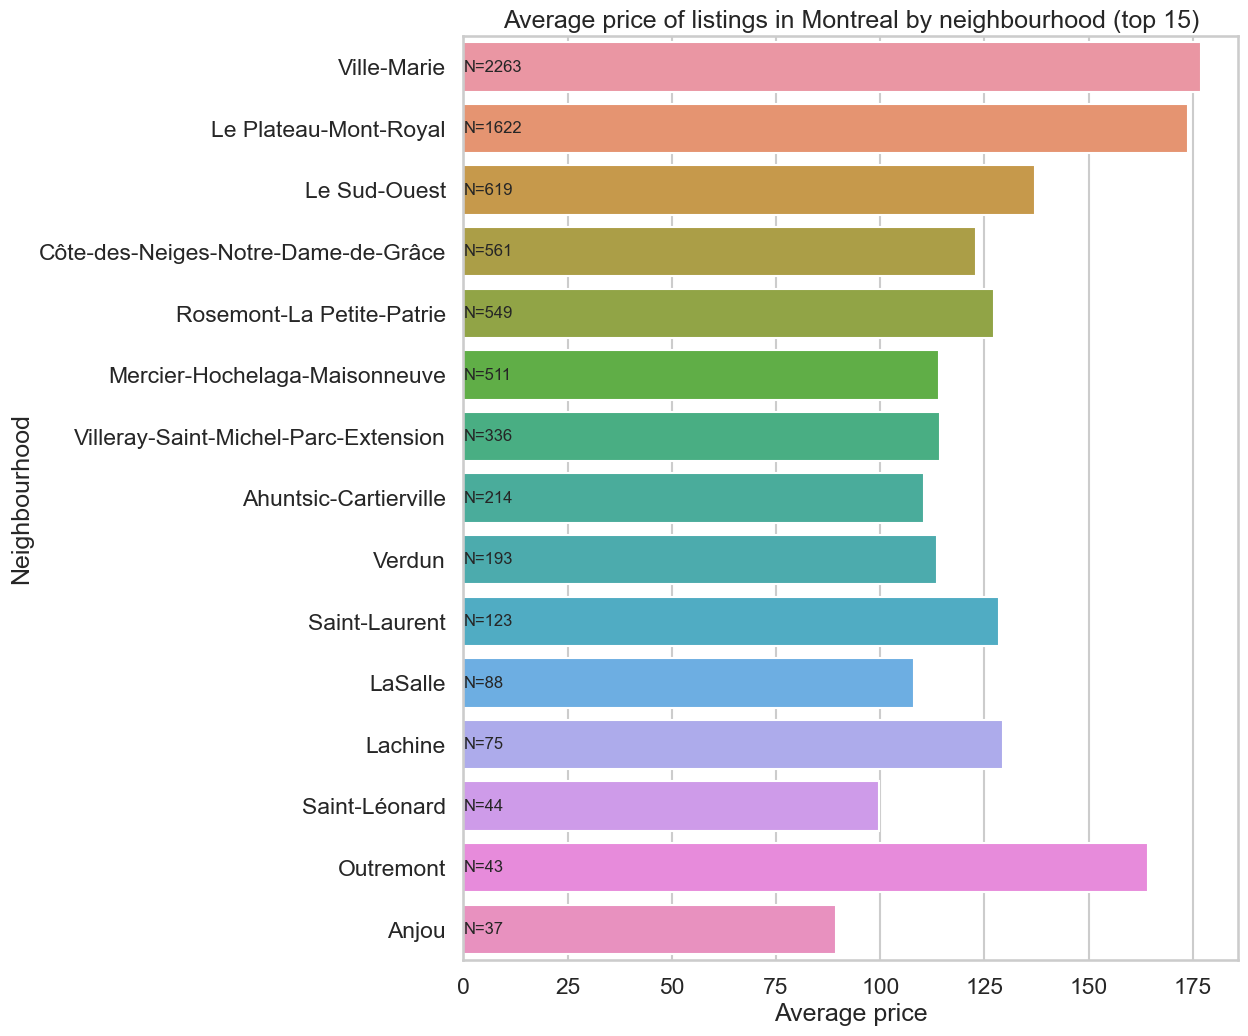

In [13]:
# Finally, we plot the mean price of listings in the top 15 neighbourhoods
avg_price_by_neighborhood = (
    (
        data_cleaned[
            data_cleaned["neighbourhood_cleansed"].isin(
                num_listings_by_neighborhood.iloc[:15].neighbourhood.values
            )
        ]
        .groupby("neighbourhood_cleansed")["price"]
        .agg(["mean", "count"])
    )
    .reindex(index=num_listings_by_neighborhood.iloc[:15].neighbourhood.values)
    .reset_index()
)

plt.figure(figsize=(10, 12))
ax = sns.barplot(
    avg_price_by_neighborhood,
    y="neighbourhood_cleansed",
    x="mean",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
)

for i in range(15):
    ax.text(
        0,
        i,
        f"N={avg_price_by_neighborhood.iloc[i]['count']}",
        va="center",
        fontsize=12,
    )

ax.set_title(
    f"Average price of listings in {city.capitalize()} by neighbourhood (top 15)"
)
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Average price")
plt.show()

The average price does vary by neighborhood, indicating that the location of the listing is an important factor in determining the price. We can conduct a statistical test to see if the difference in average price between neighborhoods is significant.

Since we have more than two groups, we will use [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to test if the difference in average price between neighborhoods is significant.

In [14]:
f_stat, p_value = stats.f_oneway(
    *data_cleaned.groupby("neighbourhood_cleansed")["price"]
    .apply(list)
    .reset_index()["price"]
    .values
)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

f-statistic: 22.127393800990944
p-value: 1.2576626912286525e-125


Since the computed p-value is less than 0.05, we can reject the null hypothesis that the average price is the same across all neighborhoods. This means that the difference in average price between neighborhoods is statistically significant.

### How does the type of property (apartment, house, private room, shared room) affect the price?

We see that most listings are for entire apartments/houses, followed by private rooms. We can double-click on the legend to hide/show the different property types.

In [15]:
# First, we check the `room_type` column
num_listings_by_room_type = (
    data_cleaned["room_type"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "room_type", "room_type": "count"})
)

num_listings_by_room_type.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by room type in {city.capitalize()}"
).relabel_index(
    {0: "Room type", 1: "# of listings"},
    axis="columns",
)

Room type,# of listings
Entire home/apt,6160
Private room,1305
Shared room,55
Hotel room,15


Within the "Entire home/apt" room type, ~72% of the listings are for the entire unit. This indicates that the `property_type` column is redundant, and we can directly use `room_type` as a feature in our model.

In [16]:
data_cleaned[data_cleaned["room_type"] == "Entire home/apt"][
    "property_type"
].value_counts(normalize=True).to_frame()

,property_type
Entire rental unit,0.719318
Entire condo,0.148539
Entire loft,0.047403
Entire home,0.034416
Entire serviced apartment,0.018506
Entire townhouse,0.013799
Entire guest suite,0.005195
Room in aparthotel,0.004708
Entire bungalow,0.002273
Entire cottage,0.001299


#### Average price by room type

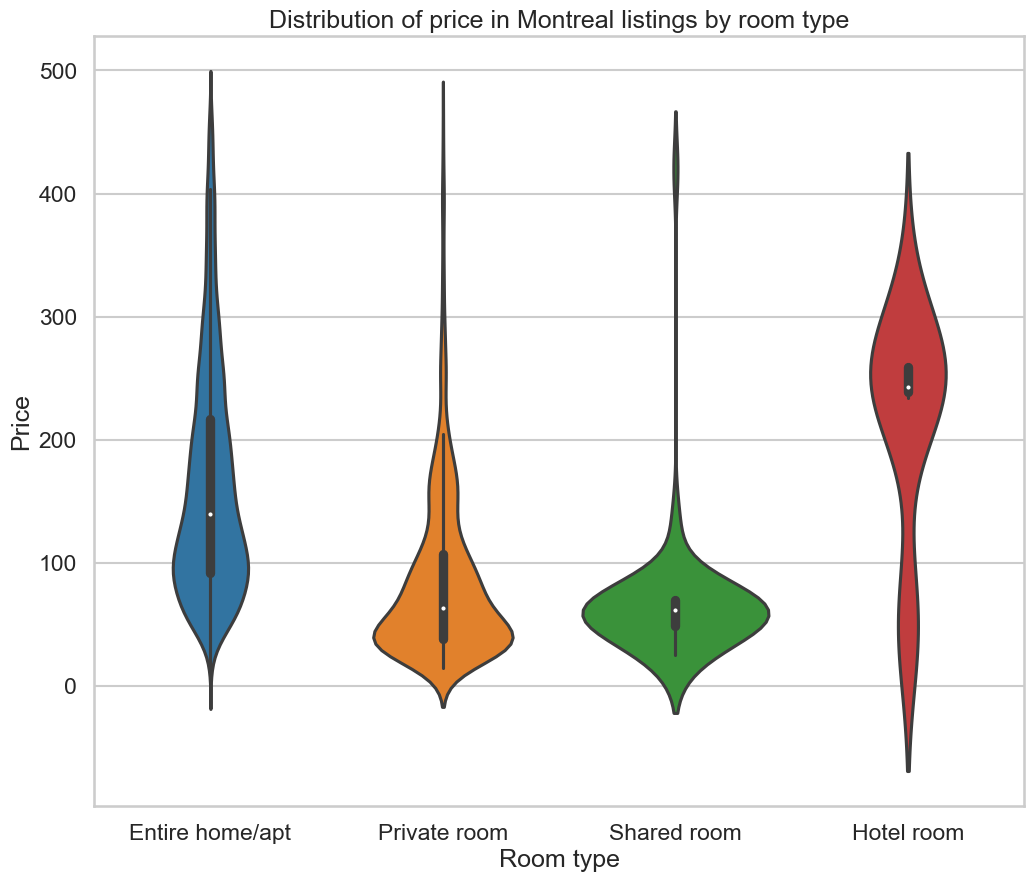

In [29]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    data=data_cleaned,
    x="room_type",
    y="price",
    order=num_listings_by_room_type.room_type.values,
)
ax.set_title(f"Distribution of price in {city.capitalize()} listings by room type")
ax.set_ylabel("Price")
ax.set_xlabel("Room type")
plt.show()

### What is the impact of the number of bedrooms, bathrooms, and the ability to accommodate guests on the price?

<Axes: xlabel='count', ylabel='beds'>

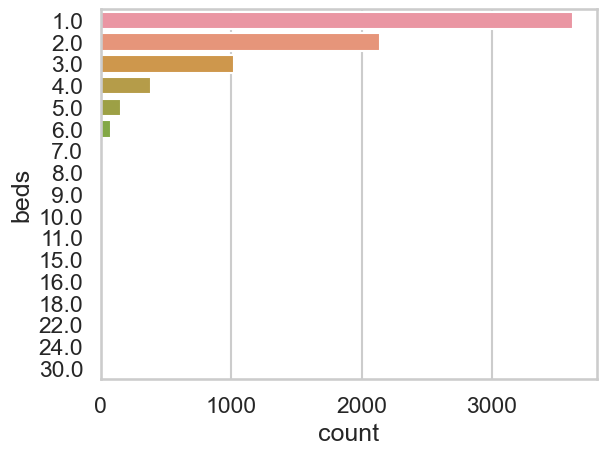

In [31]:
# Beds
sns.countplot(y='beds', data=data_cleaned)

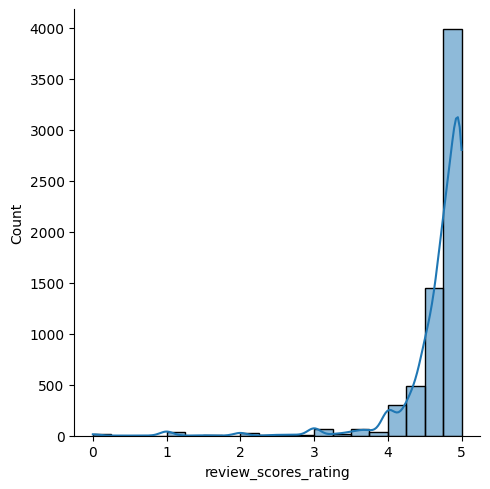

In [ ]:
# Average review rating
sns.displot(montreal_df['review_scores_rating'], bins=20, kde=True)

In [ ]:
# Plot latitude and longitude of listings using Folium
geometry = geopandas.points_from_xy(montreal_df.longitude, montreal_df.latitude)
crs = {'init': 'epsg:4326'}
montreal_gdf = geopandas.GeoDataFrame(montreal_df, crs=crs, geometry=geometry)

map = folium.Map(location=[45.5017, -73.5673], zoom_start=12, tiles="OpenStreetMap")
map
